## Chapter 3
# Analysis of a Digital Comb Filter

## Impulse Response

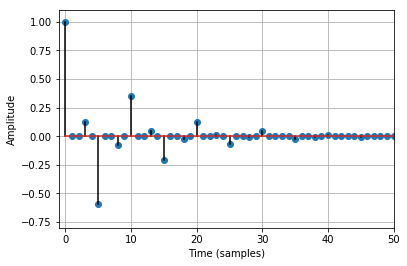

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.signal import lfilter

g1 = 0.5 ** 3; B = [1, 0, 0, g1]; # Feedforward coefficients
g2 = 0.9 ** 5; A = [1, 0, 0, 0, 0, g2]; # Feedback coefficients

h = lfilter(B, A, np.append(1, np.zeros(50))) # Impulse response
plt.stem(h, '-k')
plt.axis([-1, 50, -0.8, 1.1])
plt.ylabel('Amplitude')
plt.xlabel('Time (samples)')
plt.grid(True)

_See Figure 3.8, 3.9 on p56-57_

## Amplitude Response

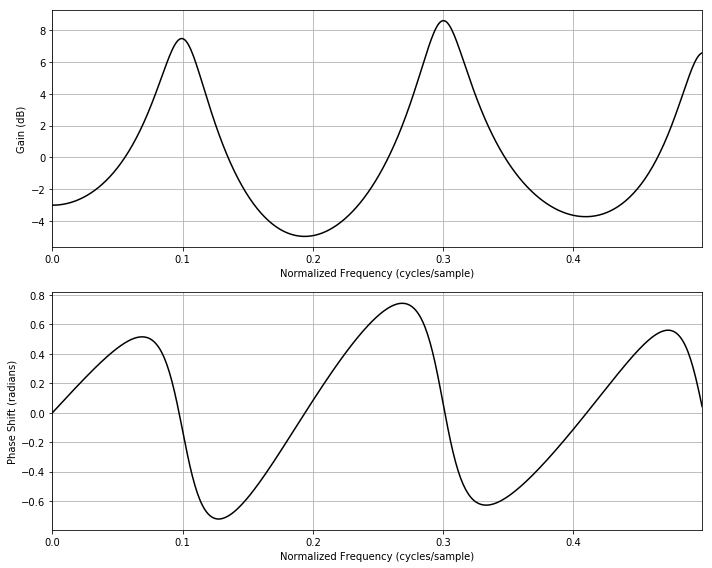

In [2]:
Nfft = 1024 # FFT size
Nspec = Nfft // 2 # Show only positive frequencies
f = np.arange(Nspec) / Nfft # Frequency axis
Xnum = np.fft.fft(B, Nfft) # Frequency response of FIR part
Xden = np.fft.fft(A, Nfft) # Frequency response of feedback part
X = Xnum / Xden

from plot_utils import plot_frequency_response

plt.figure(figsize=(10, 8))
_ = plot_frequency_response(X[:Nspec], f)

_See Figure 3.10 on p60_

## Pole-Zero Analysis

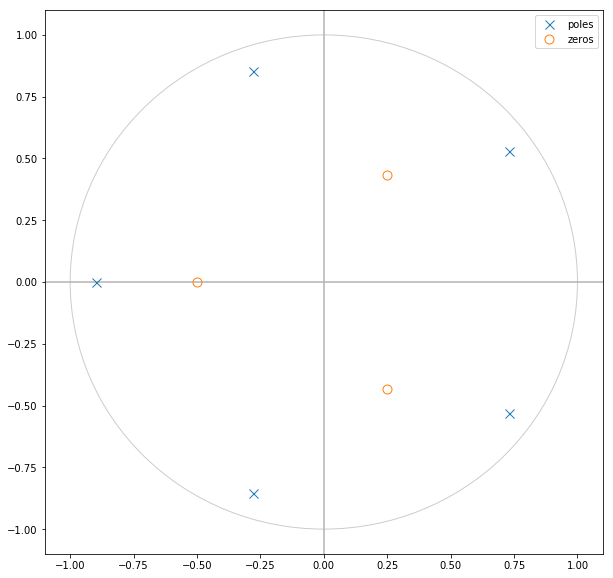

In [3]:
from scipy.signal import tf2zpk
from plot_utils import zplane

zeros, poles, gain = tf2zpk(B, A)

plt.figure(figsize=(10, 10))
zplane(zeros, poles)

_See Figure 3.12 on p64_